## VGG 使用块的网络 VGG-11

In [1]:
import torch
import sys
import os
sys.path.append(os.path.abspath("../"))
import lmy
from torch import nn
import d2l


def vgg_block(num_convs, in_channels, out_channels):
    """基础vgg块"""
    layers = []  #初始化
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels

    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [2]:



def vgg(conv_arch):
    conv_blocks = []
    in_channels = 1  # 默认初始1通道输入
    out_channels = None
    for (num_convs, out_channels) in conv_arch:
        conv_blocks.append(
            vgg_block(num_convs, in_channels, out_channels)
        )
        in_channels = out_channels
    return nn.Sequential(
        *conv_blocks, nn.Flatten(),
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(),
        nn.Linear(4096, 10)
    )


conv_arch = (
    (1, 64), (1, 128), (2, 256), (2, 512), (2, 512)  # 第一个元素表示卷积层的数量 第二个元素表示输出通道数
)
net = vgg(conv_arch)

```
X = torch.rand((1, 1, 224, 224))
for block in net:
    X = block(X)
    print(block.__class__.__name__,'shape:',X.shape)
```

In [3]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
print(small_conv_arch)
net = vgg(small_conv_arch)

[(1, 16), (1, 32), (2, 64), (2, 128), (2, 128)]


/Users/zane/Documents/GitHub/LearningPytorch/lmy/data
FashionMNIST数据集加载成功，训练集大小:60000,测试集大小:10000,数据集shape:torch.Size([1, 224, 224])
设备数量不足,已自动调整
unnamed Timer is still running
训练设备[device(type='cpu')]


  0%|          | 0/10 [03:34<?, ?epoch/s]


KeyboardInterrupt: 

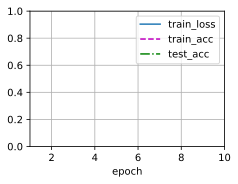

In [5]:
import lmy
import d2l
lr, num_epochs, batch_size = .05, 10, 128
lmy.train_GPU_FASHION_MNIST(net,10,lr,128,1,resize=224,net_name='VGG')